# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
#!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset

In [4]:
dataset = pd.read_csv('dados_projeto.csv',sep=';')

### Visualize o conteúdo do DataFrame

In [50]:
dataset.shape

(365, 4)

In [5]:
dataset

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
...,...,...
360,32307,24.00
361,26095,22.64
362,22309,21.68
363,20467,21.38


### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dataset.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

Text(0.5, 1.0, 'Boxplot da Temperatura Média')

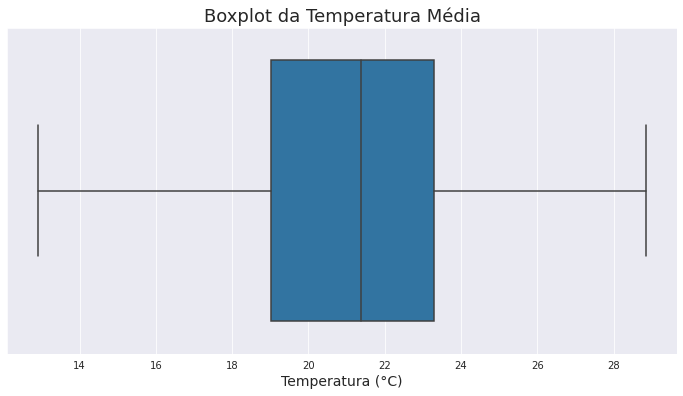

In [15]:
sns.set_style('darkgrid')
ax = sns.boxplot(x = dataset.X)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Temperatura (°C)',fontsize=14)
ax.set_title('Boxplot da Temperatura Média',fontsize=18)

Text(0.5, 1.0, 'Boxplot do Consumo de Cerveja')

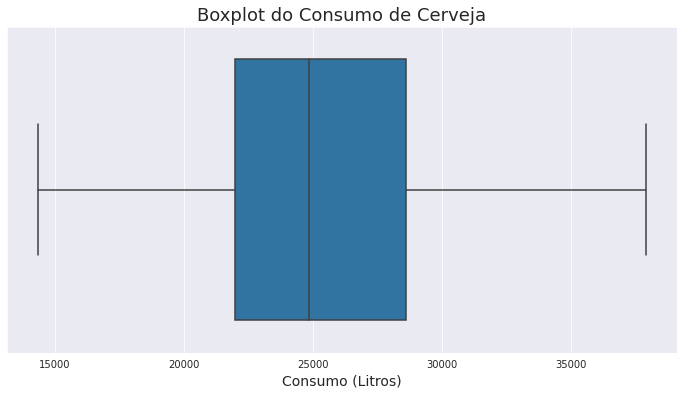

In [16]:
ax = sns.boxplot(x = dataset.Y)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Consumo (Litros)',fontsize=14)
ax.set_title('Boxplot do Consumo de Cerveja',fontsize=18)

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

Text(0.5, 1.0, 'Temperatura média x Consumo de Cerveja')

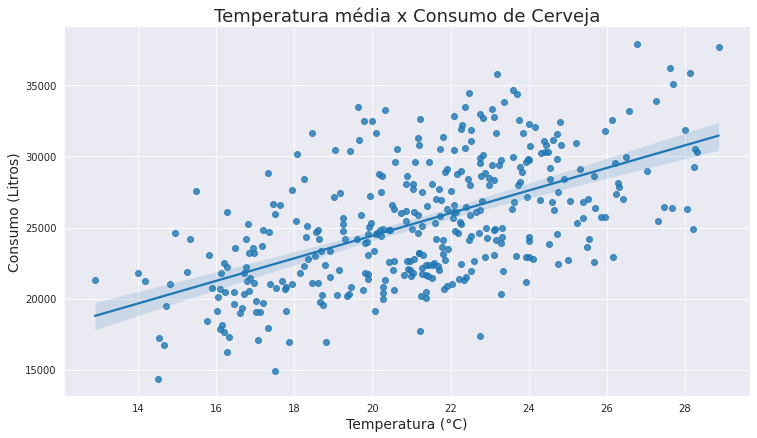

In [22]:
ax = sns.lmplot(data=dataset,x='X',y = 'Y')
ax.figure.set_size_inches(12,6)
ax.set_ylabels('Consumo (Litros)',fontsize=14)
ax.set_xlabels('Temperatura (°C)',fontsize=14)
ax.ax.set_title('Temperatura média x Consumo de Cerveja',fontsize=18)

### <font color='red'>Utilizando a matriz de correlação</font>

In [23]:
dataset.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [24]:
import statsmodels.api as sm
Y = dataset.Y
X = sm.add_constant(dataset.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [25]:
reg = sm.OLS(Y,X).fit()

### Visualize o resultado da regressão

In [26]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.87e-33
Time:                        20:24:16   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.000    6020.880     1.1e+04
X            794.8825     59.423     13.377      0.000     678.027     911.738
==============================================================================
Omnibus:                       11.300   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.673
Skew:                           0.324   Prob(JB):                      0.00793
Kurtosis:                       2.534   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Obtenha o $Y$ previsto

In [28]:
dataset['Y_previsto'] = reg.predict()
dataset

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
...,...,...,...
360,32307,24.00,27606.088172
361,26095,22.64,26525.047922
362,22309,21.68,25761.960686
363,20467,21.38,25523.495925


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [30]:
reg.predict([1,42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [32]:
dataset['Residuos'] = dataset['Y'] - dataset['Y_previsto']
dataset

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
...,...,...,...,...
360,32307,24.00,27606.088172,4700.911828
361,26095,22.64,26525.047922,-430.047922
362,22309,21.68,25761.960686,-3452.960686
363,20467,21.38,25523.495925,-5056.495925


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0.5, 1.0, 'Y_previsto x Residuos')

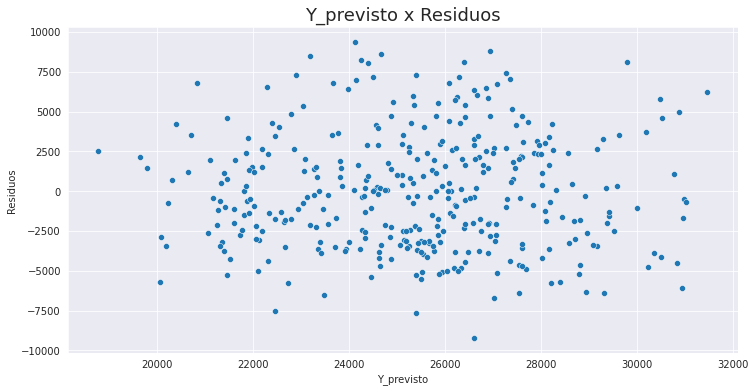

In [38]:
ax = sns.scatterplot(x = dataset['Y_previsto'],y=dataset.Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Y_previsto x Residuos',fontsize=18)

### Obtenha o QQPlot dos resíduos

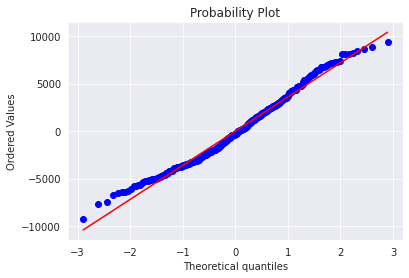

In [45]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
qq = probplot(dataset.Residuos,plot=plt)

### <font color='red'> Os resíduos não aparenta se distribuírem normalmente, contudo os resíduos têm variação constante </font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [46]:
SQR = sum((dataset.Y_previsto - dataset.Y.mean())**2)
SQR

2325899486.7377834

In [47]:
SQT = sum((dataset.Y - dataset.Y.mean())**2)
SQT

7044294174.805479

In [48]:
R2 = SQR/SQT
R2

0.3301820493324316

In [51]:
reg.rsquared

0.330182049332432